<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

[Данные - https://www.kaggle.com/usdot/flight-delays  ](https://www.kaggle.com/usdot/flight-delays) 

Описание - Сводная информация о количестве своевременных, задержанных, отмененных и измененных рейсов в США за 2015 год (5.8 млн записей)
  

In [23]:
import pandas as pd
import datetime as dt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt
import matplotlib.pyplot as plt
import folium
from folium.features import DivIcon

In [24]:
%%time
airlines= pd.read_csv('data/airlines.csv')
airports= pd.read_csv('data/airports.csv')
flights= pd.read_csv('data/flights.csv',dtype={'ORIGIN_AIRPORT':str,'DESTINATION_AIRPORT':str})

Wall time: 52.5 s


In [25]:
airports.dropna(axis=0, inplace=True)

In [26]:
# Create a list of tuples of latitude and longitude and a list to store the IATA code
lat_lon_pairs = []
airport_code = []
for i in range(airports.shape[0]):
    
    # Adding lat lon pairs
    lat_i = airports['LATITUDE'].iloc[i]
    lon_i = airports['LONGITUDE'].iloc[i]
    lat_lon_pair = (lat_i, lon_i)
    lat_lon_pairs.append(lat_lon_pair)
    
    # Addinf IATA Code
    iata_i = airports['IATA_CODE'].iloc[i]
    airport_code.append(iata_i)

In [27]:
# Plotting the airport locations on map

# 1. Create Map of USA

usa_lat = 32.41132
usa_lon = 99.6819

usa_map = folium.Map(location=(usa_lat, usa_lon), width=1000, height=500)

# 2. Plot the map with IATA code
html = '<div style="color:red;font-size: 8pt">airport_code</div>'
for loc, air_code in zip(lat_lon_pairs, airport_code):
    folium.Marker(loc, icon=DivIcon(
                       icon_size=(30,30),
                       icon_anchor=(0,0),
                       html=html.replace('airport_code', air_code),
                        )).add_to(usa_map)
    
# 3. Plot the Map with marker
for loc, air_code in zip(lat_lon_pairs, airport_code):
    folium.Marker(loc).add_to(usa_map)
    
usa_map

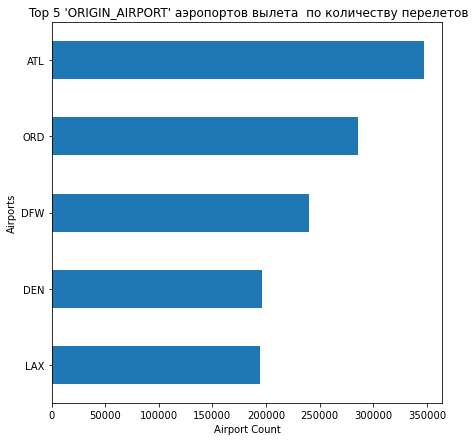

In [94]:
# Plot top 5 аэропортов вылета по количеству перелетов
flights['ORIGIN_AIRPORT'].value_counts().sort_values().iloc[-5:].plot(kind='barh',figsize = (7, 7))
plt.xlabel("Airport Count")
plt.ylabel("Airports")
plt.title(" Top 5 'ORIGIN_AIRPORT' аэропортов вылета  по количеству перелетов")
plt.show()

In [38]:
top_5_des_airports = flights['DESTINATION_AIRPORT'].value_counts().sort_values().iloc[-5:].index

In [39]:
top_5_des_airports

Index(['LAX', 'DEN', 'DFW', 'ORD', 'ATL'], dtype='object')

In [41]:
# Find lat longs of top 10 origin airports
top_5_des_airports_lat_lon = []
for airport in top_5_des_airports:
    
    lat = airports[airports['IATA_CODE'] == airport]['LATITUDE']
    lon = airports[airports['IATA_CODE'] == airport]['LONGITUDE']
    
    lat_lon = (lat, lon)
    top_5_des_airports_lat_lon.append(lat_lon)

In [42]:
# Plotting 

# 1. Create Map of USA

usa_lat = 32.41132
usa_lon = 99.6819

usa_map = folium.Map(location=(usa_lat, usa_lon), width=800, height=500)

# 2. Plot the map with IATA code
html = '<div style="color:red;font-size: 8pt">airport_code</div>'
for loc, air_code in zip(top_5_des_airports_lat_lon, top_5_des_airports):
    folium.Marker(loc, icon=DivIcon(
                       icon_size=(30,30),
                       icon_anchor=(0,0),
                       html=html.replace('airport_code', air_code),
                        )).add_to(usa_map)
    
# 3. Plot the Map with marker
for loc, air_code in zip(top_5_des_airports_lat_lon, top_5_des_airports):
    folium.Marker(loc).add_to(usa_map)
    
usa_map


In [54]:
top_6_delay_airports = flights['DESTINATION_AIRPORT'].value_counts().sort_values().iloc[-6:].reset_index().copy()
top_6_delay_airports['index1']=['PLN', 'BJI', 'ESC', 'CIU', 'ABR', 'WYS']
top_6_delay_airports = top_6_delay_airports.set_index(['index1']).index
top_6_delay_airports

Index(['PLN', 'BJI', 'ESC', 'CIU', 'ABR', 'WYS'], dtype='object', name='index1')

In [39]:
top_5_des_airports

Index(['LAX', 'DEN', 'DFW', 'ORD', 'ATL'], dtype='object')

In [55]:
# Find lat longs of top 10 origin airports
top_6_delay_airports_lat_lon = []
for airport in top_6_delay_airports:
    
    lat = airports[airports['IATA_CODE'] == airport]['LATITUDE']
    lon = airports[airports['IATA_CODE'] == airport]['LONGITUDE']
    
    lat_lon = (lat, lon)
    top_6_delay_airports_lat_lon.append(lat_lon)

In [95]:
# Plotting 

# 1. Create Map of USA

usa_lat = 32.41132
usa_lon = 99.6819

usa_map = folium.Map(location=(usa_lat, usa_lon), width=800, height=500)

# 2. Plot the map with IATA code
html = '<div style="color:red;font-size: 8pt">airport_code</div>'
for loc, air_code in zip(top_6_delay_airports_lat_lon, top_6_delay_airports):
    folium.Marker(loc, icon=DivIcon(
                       icon_size=(30,30),
                       icon_anchor=(0,0),
                       html=html.replace('airport_code', air_code),
                        )).add_to(usa_map)
    
# 3. Plot the Map with marker
for loc, air_code in zip(top_6_delay_airports_lat_lon, top_6_delay_airports):
    folium.Marker(loc).add_to(usa_map)
    
usa_map

In [ ]:
top_6_delay_airports

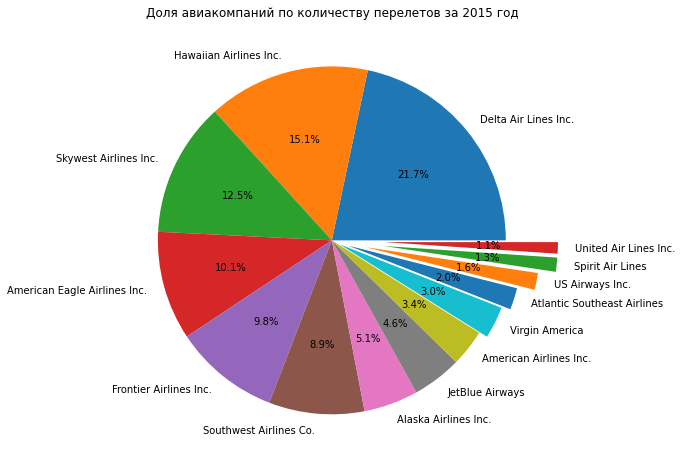

In [81]:
airlines_labels = list(airlines['AIRLINE'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(flights['AIRLINE'].value_counts(), autopct = '%1.1f%%', labels = airlines_labels, explode = (0,0,0,0,0,0,0,0,0,0.05,0.1,0.2,0.3,0.3))
plt.title("Доля авиакомпаний по количеству перелетов за 2015 год")
plt.show()

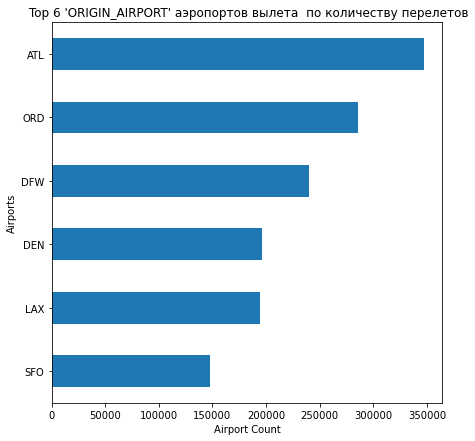

In [92]:
# Plot top 5 аэропортов вылета по количеству перелетов
flights['ORIGIN_AIRPORT'].value_counts().sort_values().iloc[-6:].plot(kind='barh',figsize = (7, 7))
plt.xlabel("Airport Count")
plt.ylabel("Airports")
plt.title(" Top 6 'ORIGIN_AIRPORT' аэропортов вылета  по количеству перелетов")
plt.show()